# dT: compare CRY + pileup with and without veto

Why does dT perform poorly with pileup, look at momentum. Can it be optimised? 

## Input

* SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV (SU2020b without the dT veto cut applied)

## Notes

* Compare CRY + pileup with and without veto. 
* Overlay Select and Veto distributions 
* Then make dT from the events themselves, with and without a cut at 85 MeV/c 

## Preamble

In [32]:
import sys
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load
from analyse import Analyse
from pyutils.pyplot import Plot
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
from pyutils.pyprint import Print

import awkward as ak
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Load data

In [177]:
ana_label = "SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV"
data = Load(in_path = f"../../output/results/{ana_label}").load_pkl() 

[Load] ✅ Initialised with out_path=../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl


## Verify 

In [164]:
display(data["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,139272,6.446,98.843,>20 active tracker hits


## Plot dT from hist objects

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


/home/sgrant/.conda/envs/ana_v2.4.0/lib/python3.12/site-packages/hist/basehist.py:444: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


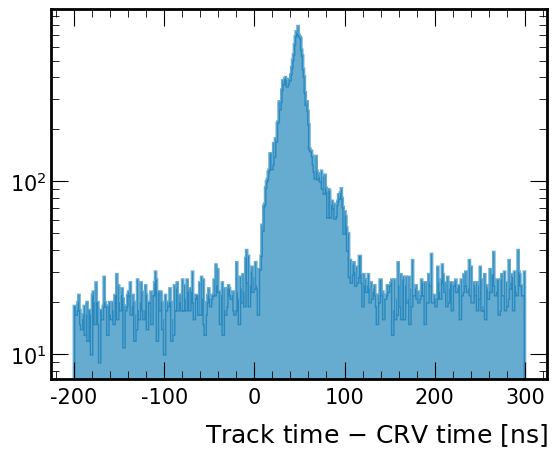

In [165]:
draw = Draw()
fig, ax = plt.subplots()
draw._plot_histogram(data["hists"]["dT"], selection=["Select"], ax=ax)
ax.set_yscale("log")

In [166]:
plotter = Plot()
selector = Select()
printer = Print()
vector = Vector()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyvector] ⭐️ Initialised Vector with verbosity = 1


In [167]:
# Sort out data
# data["events"] = data["events"]["trk"][data["events"]["select"]]

In [168]:
printer.print_n_events(data["events"]) # [data["events"]["select"]])

[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 60533
evt.event: 300883
crv.crvcoincs.time: [1.31e+03]
crv.crvcoincs.nHits: [16]
crv.crvcoincs.pos.fCoordinates.fZ: [-5.35e+03]
at_trk_front: [[False, False, False, True, False], ..., [False, False, ..., False, True]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, True, True, True]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.795, 0.8, 0.964, 0.948, 0.978], ..., [-0.797, -0.803, ..., -0.98, 0.822]]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_

# dT wrangling 

Selected dT has shape [E, T, S, C]

Note that dT is a mask and does not have "select" applied, so do that

In [196]:
dT = data["events"]["dT"][data["events"]["select"]] 
# data["events"]["dT_flat"] = dT
print(len(ak.flatten(dT, axis=None)))
dT.type.show()

49844
16981 * var * option[var * var * float64]


## Get unvetoed dT 

In [179]:
unvetoed = data["events"]["unvetoed_raw"][data["events"]["select"]]
# print(unvetoed.type.show())
unvetoed_dT = ak.mask(dT, unvetoed) # preserve structure?
# Fill in empty arrays with Nones 
# valid = ak.count(unvetoed_dT, axis=-1) > 0
# unvetoed_dT = ak.mask(unvetoed_dT, valid)
# unvetoed_dT = ak.fill_none(unvetoed_dT, -np.inf)
unvetoed_dT.type.show()

16981 * var * option[var * var * float64]


In [183]:
data["events"]["dT_trk"] = dT
data["events"]["unvetoed_dT_trk"] = unvetoed_dT

In [172]:
# ## Flatten to track level
# dT = ak.flatten(ak.flatten(dT, axis=-1), axis=-1)
# unvetoed_dT = ak.flatten(ak.flatten(unvetoed_dT, axis=-1), axis=-1)



# dT.type.show()
# unvetoed_dT.type.show()

16981 * var * float64
16981 * var * float64


## Check that worked

	Wrote ../../output/images/comp/dT/h1_1x2_dT.png


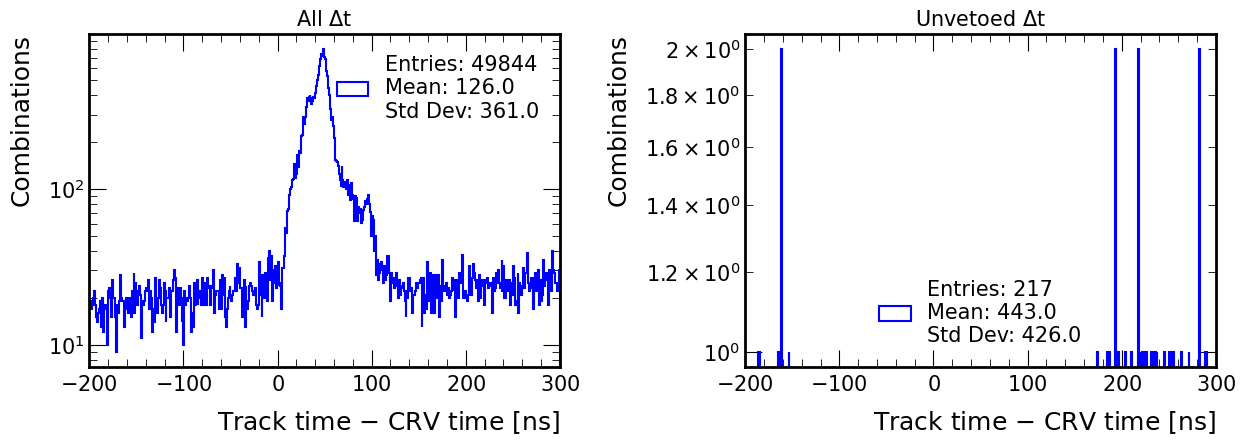

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(dT, axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"All $\Delta t$",
    log_y=True,
    ax=ax[0],
    show=False,
    col="blue"
)

plotter.plot_1D( 
    ak.flatten(unvetoed_dT, axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    title=r"Unvetoed $\Delta t$",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    log_y=True,
    ax=ax[1],
    show=False,
    col="blue"
)

plt.tight_layout()

out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

out_file_name = f"{out_path}/h1_1x2_dT.png"

plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## Now get momenta 

In [181]:
trkfit = data["events"]["trkfit"]
mom_mag = vector.get_mag(trkfit["trksegs"], "mom")
at_trk_front = selector.select_surface(trkfit, surface_name="TT_Front")
mom_mag_at_trk_front = mom_mag[at_trk_front]
mom_mag_at_trk_front = ak.flatten(mom_mag_at_trk_front, axis=-1)
mom_mag.type.show()
mom_mag_at_trk_front.type.show()

data["events"]["mom_mag"] = mom_mag
data["events"]["mom_mag_at_trk_front"] = mom_mag_at_trk_front

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
[pyselect] ✅ Returning mask for trksegs with sid = 0
16981 * var * option[var * float32]
16981 * var * float32


In [184]:
printer.print_n_events(data["events"]) 

[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 60533
evt.event: 300883
crv.crvcoincs.time: [1.31e+03]
crv.crvcoincs.nHits: [16]
crv.crvcoincs.pos.fCoordinates.fZ: [-5.35e+03]
at_trk_front: [[False, False, False, True, False], ..., [False, False, ..., False, True]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, True, True, True]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.795, 0.8, 0.964, 0.948, 0.978], ..., [-0.797, -0.803, ..., -0.98, 0.822]]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_

In [185]:
# valid = ak.count(unvetoed_dT, axis=-1) > 0
# unvetoed_dT = ak.mask(unvetoed_dT, valid)
# # test = test[mom_mag_at_trk_front > 85]
# test.type.show()

In [186]:
# test masks 
test1 = dT[mom_mag_at_trk_front > 85]

# valid = ~ak.is_none(unvetoed_dT, axis=-1)
# mom_mag_at_trk_front_valid = mom_mag_at_trk_front[valid]
# unvetoed_dT_valid = unvetoed_dT_valid[valid]
test2 = unvetoed_dT[mom_mag_at_trk_front > 85]

## Check that worked again

	Wrote ../../output/images/comp/dT/h1_1x2_dT_above_85MeVc.png


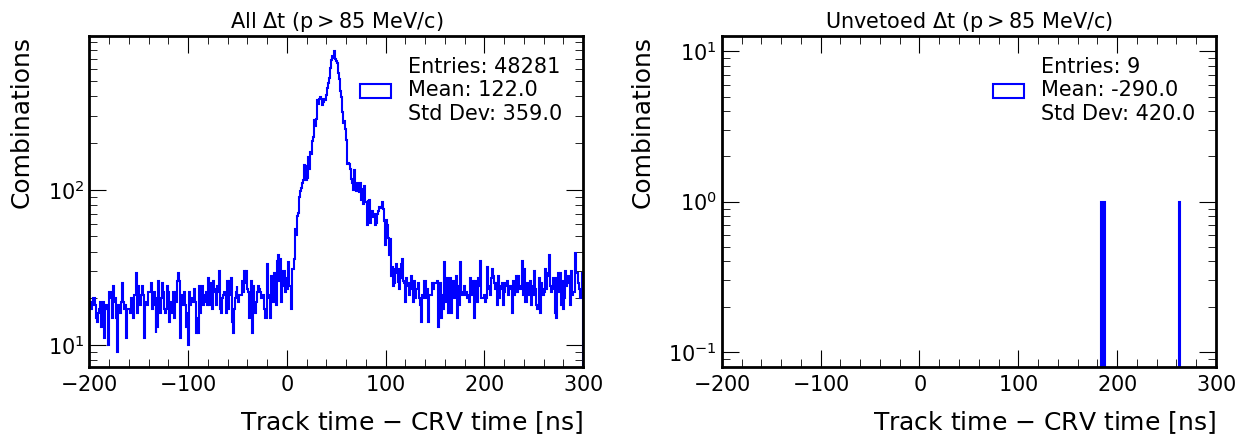

In [187]:
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(dT[mom_mag_at_trk_front > 85], axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"All $\Delta t$ ($p > 85$ MeV/c)",
    log_y=True,
    ax=ax[0],
    show=False,
    col="blue"
)

plotter.plot_1D( 
    ak.flatten(unvetoed_dT[mom_mag_at_trk_front > 85], axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    title=r"Unvetoed $\Delta t$ ($p > 85$ MeV/c)",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    log_y=True,
    ax=ax[1],
    show=False,
    col="blue"
)

plt.tight_layout()

out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

out_file_name = f"{out_path}/h1_1x2_dT_above_85MeVc.png"

plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## Then find the leading dT 

In [198]:
leading_dT = dT[ak.argmin(abs(dT), axis=-1, keepdims=True)]
leading_unvetoed_dT = unvetoed_dT[ak.argmin(abs(unvetoed_dT), axis=-1, keepdims=True)]

# Fill in None
# leading_dT = ak.fill_none(leading_dT, -np.inf)
# leading_unvetoed_dT = ak.fill_none(leading_unvetoed_dT, -np.inf)

data["events"]["leading_dT"] = leading_dT
data["events"]["leading_unvetoed_dT"] = leading_unvetoed_dT

print(leading_dT.type.show())
print(len(ak.flatten(leading_dT, axis=None)))

16981 * var * option[var * var * ?float64]
None
16957


In [191]:
test3=leading_dT[mom_mag_at_trk_front > 85]
test4=leading_unvetoed_dT[mom_mag_at_trk_front > 85]

In [189]:
printer.print_n_events(data["events"]) 

[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 60533
evt.event: 300883
crv.crvcoincs.time: [1.31e+03]
crv.crvcoincs.nHits: [16]
crv.crvcoincs.pos.fCoordinates.fZ: [-5.35e+03]
at_trk_front: [[False, False, False, True, False], ..., [False, False, ..., False, True]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, True, True, True]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.795, 0.8, 0.964, 0.948, 0.978], ..., [-0.797, -0.803, ..., -0.98, 0.822]]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_

	Wrote ../../output/images/comp/dT/h1_1x2_leading_dT_above_85MeVc.png


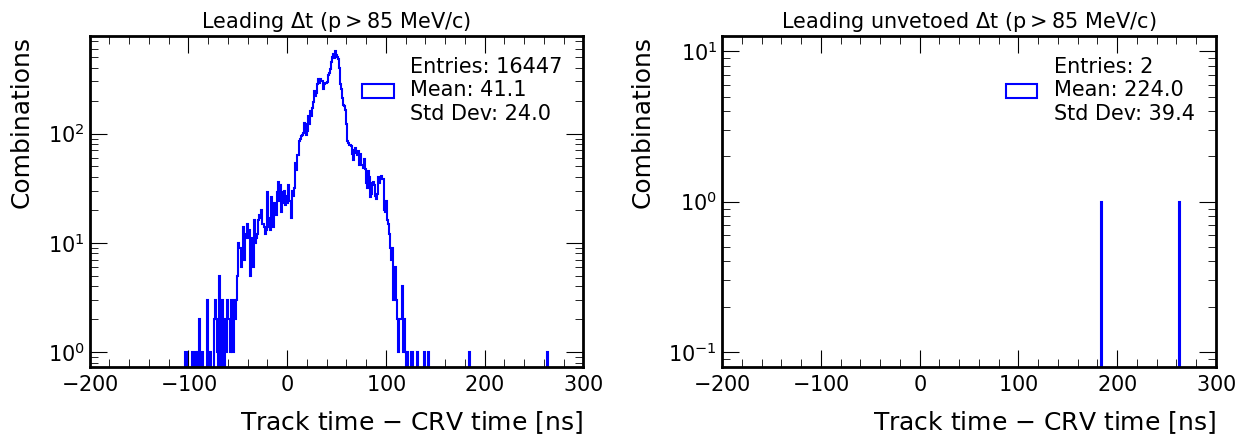

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

plotter.plot_1D( 
    ak.flatten(leading_dT[mom_mag_at_trk_front > 85], axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"Leading $\Delta t$ ($p > 85$ MeV/c)",
    log_y=True,
    ax=ax[0],
    show=False,
    col="blue"
)

plotter.plot_1D( 
    ak.flatten(leading_unvetoed_dT[mom_mag_at_trk_front > 85], axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    title=r"Leading unvetoed $\Delta t$ ($p > 85$ MeV/c)",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    log_y=True,
    ax=ax[1],
    show=False,
    col="blue"
)

plt.tight_layout()

out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

out_file_name = f"{out_path}/h1_1x2_leading_dT_above_85MeVc.png"

plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

In [199]:
### Note that some leading dTs are None, and then you reduce this further with the momentum cut 

## Better plots

	Wrote ../../output/images/comp/dT/h1_2x2_dT.png


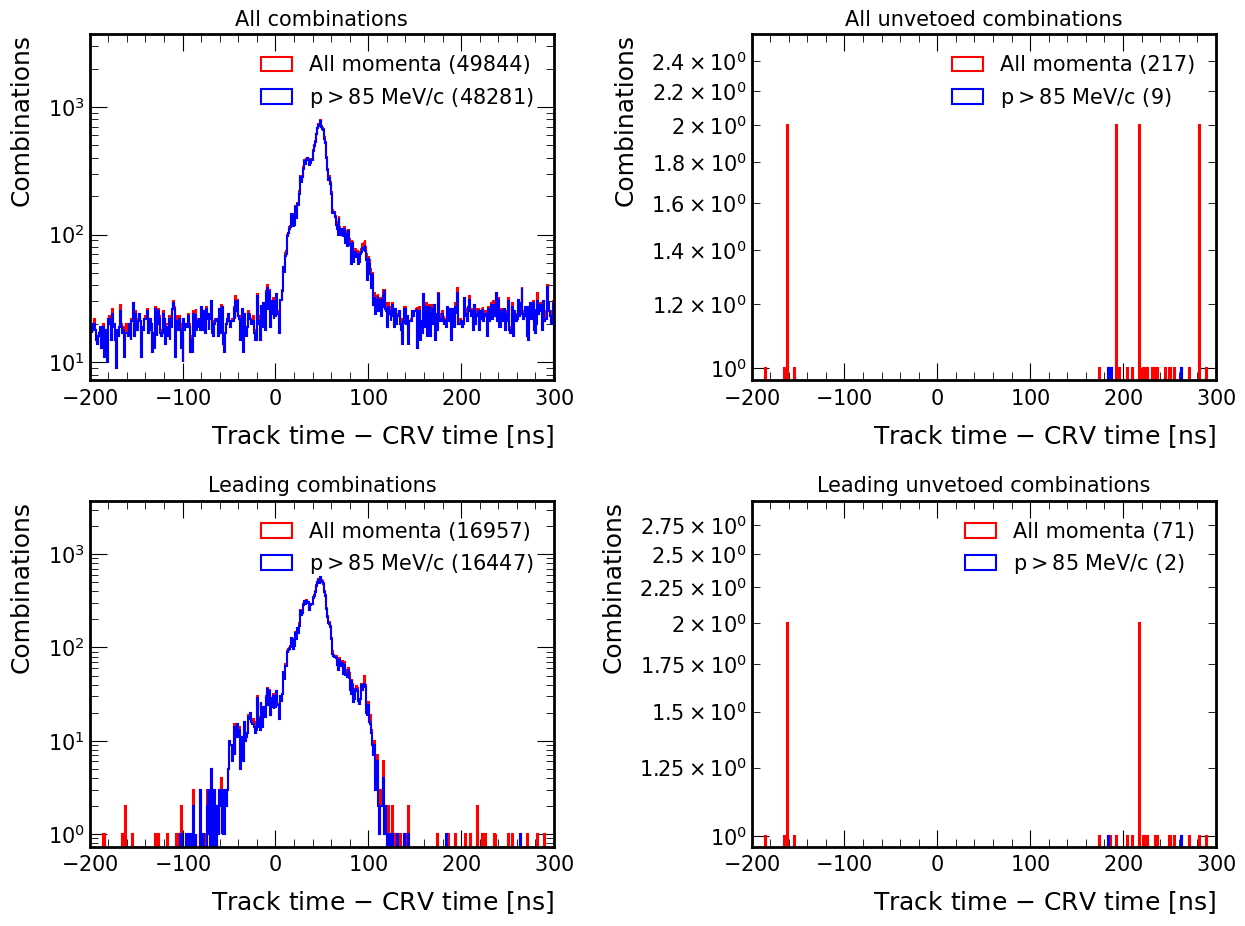

In [231]:
fig, ax = plt.subplots(2, 2, figsize=(2*6.4, 2*4.8))

flat_dT = ak.flatten(dT, axis=None)
flat_dT_above_85 = ak.flatten(dT[mom_mag_at_trk_front > 85], axis=None)


plotter.plot_1D_overlay( 
    {
         f"All momenta ({len(flat_dT)})" : flat_dT,
        r"$p > 85$ MeV/c " +  f"({len(flat_dT_above_85)})" : flat_dT_above_85
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"All combinations",
    log_y=True,
    ax=ax[0,0],
    show=False
)

ax[0,0].set_ylim(top=ax[0,0].get_ylim()[1] * 3.75)
ax[0,0].legend(loc="upper right")

flat_unvetoed_dT = ak.flatten(unvetoed_dT, axis=None)
flat_unvetoed_dT_above_85 = ak.flatten(unvetoed_dT[mom_mag_at_trk_front > 85], axis=None)

plotter.plot_1D_overlay( 
    {
        f"All momenta ({len(flat_unvetoed_dT)})" : flat_unvetoed_dT,
        r"$p > 85$ MeV/c " +  f"({len(flat_unvetoed_dT_above_85)})" : flat_unvetoed_dT_above_85
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"All unvetoed combinations",
    log_y=True,
    ax=ax[0,1],
    show=False
)

ax[0,1].set_ylim(top=ax[0,1].get_ylim()[1] * 1.25)
ax[0,1].legend(loc="upper right")

flat_leading_dT = ak.flatten(leading_dT, axis=None)
flat_leading_dT_above_85 = ak.flatten(leading_dT[mom_mag_at_trk_front > 85], axis=None)

plotter.plot_1D_overlay( 
    {
        f"All momenta ({len(flat_leading_dT)})" : flat_leading_dT,
        r"$p > 85$ MeV/c " +  f"({len(flat_leading_dT_above_85)})" : flat_leading_dT_above_85
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"Leading combinations",
    log_y=True,
    ax=ax[1,0],
    show=False
)

ax[1,0].set_ylim(top=ax[1,0].get_ylim()[1] * 4.75)
ax[1,0].legend(loc="upper right")

flat_leading_unvetoed_dT = ak.flatten(leading_unvetoed_dT, axis=None)
flat_leading_unvetoed_dT_above_85 = ak.flatten(leading_unvetoed_dT[mom_mag_at_trk_front > 85], axis=None)

plotter.plot_1D_overlay( 
    {
        f"All momenta ({len(flat_leading_unvetoed_dT)})" : flat_leading_unvetoed_dT,
        r"$p > 85$ MeV/c " +  f"({len(flat_leading_unvetoed_dT_above_85)})" : flat_leading_unvetoed_dT_above_85
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    title=r"Leading unvetoed combinations",
    log_y=True,
    ax=ax[1,1],
    show=False
)

ax[1,1].set_ylim(top=ax[0,1].get_ylim()[1] * 1.15)
ax[1,1].legend(loc="upper right")


# plotter.plot_1D( 
#     ak.flatten(unvetoed_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"Unvetoed $\Delta t$",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

plt.tight_layout()

out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

out_file_name = f"{out_path}/h1_2x2_dT.png"

plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

	Wrote ../../output/images/comp/dT/h2_1x2_mom_vs_dT.png


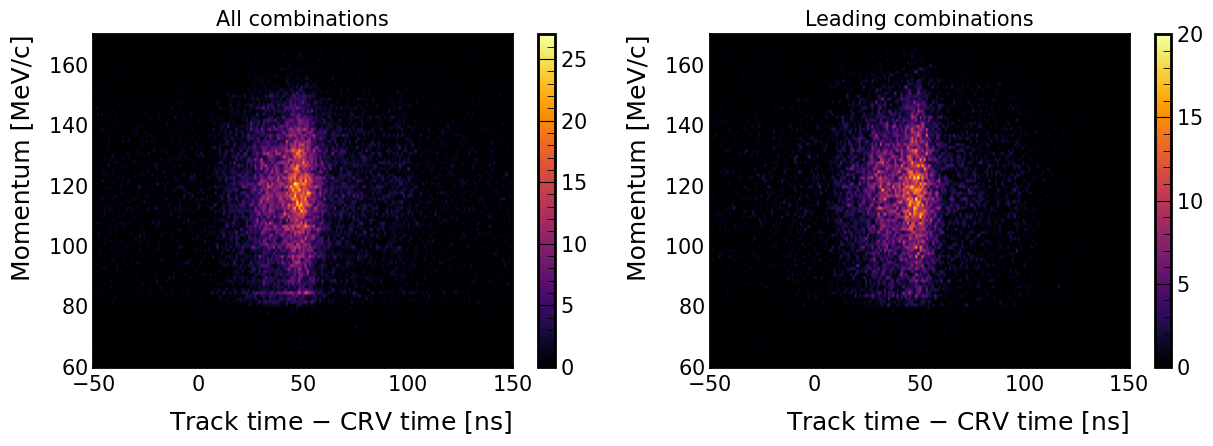

In [250]:


fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))

flat_mom_mag = ak.flatten(mom_mag, axis=None)
flat_mom_mag_at_trk_front = ak.flatten(mom_mag_at_trk_front, axis=None)

plotter.plot_2D( 
    x=flat_dT,
    y=flat_mom_mag, # idk why this works 
    nbins_x=200,
    xmin=-50, 
    xmax=150,
    nbins_y=110,
    ymin=60, 
    ymax=170,
    title="All combinations",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    show=False,
    ax=ax[0]
)

# plotter.plot_2D( 
#     x=flat_unvetoed_dT,
#     y=flat_mom_mag, # idk why this works 
#     nbins_x=200,
#     xmin=-50, 
#     xmax=150,
#     nbins_y=110,
#     ymin=60, 
#     ymax=170,
#     title="All unvetoed combinations",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Momentum [MeV/c]",
#     show=False,
#     ax=ax[0,1]
# )

plotter.plot_2D( 
    x=flat_leading_dT,
    y=flat_mom_mag_at_trk_front,
    nbins_x=200,
    xmin=-50, 
    xmax=150,
    nbins_y=110,
    ymin=60, 
    ymax=170,
    title="Leading combinations",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    show=False,
    ax=ax[1]
)

# plotter.plot_2D( 
#     x=flat_leading_unvetoed_dT,
#     y=flat_mom_mag_at_trk_front,
#     nbins_x=200,
#     xmin=-50, 
#     xmax=150,
#     nbins_y=110,
#     ymin=60, 
#     ymax=170,
#     title="Leading unvetoed combinations",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Momentum [MeV/c]",
#     show=False,
#     ax=ax[1,1]
# )


plt.tight_layout()

out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

out_file_name = f"{out_path}/h2_1x2_mom_vs_dT.png"

plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

In [232]:
# printer.print_n_events(data["events"])

# Plot 

Leading dT, leading dT with veto, leading dT above 85 MeV/c, leading dT above 85 MeV/c with veto 

In [233]:


# fig, ax = plt.subplots(2, 2, figsize=(2*6.4, 2*4.8))

# # data["events"]["dT_min"] = ak.min(abs(data["events"]["dT_min"]), axis=2)

# plotter.plot_1D( 
#     ak.flatten(leading_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     title="Leading",
#     log_y=True,
#     ax=ax[0,0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( 
#     ak.flatten(leading_unvetoed_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"Leading (unvetoed)",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[0, 1],
#     show=False,
#     col="blue"
# )


# plotter.plot_1D( 
#     ak.flatten(leading_dT[mom_mag > 85], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"Leading (p > 85 MeV/c)",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1, 0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( 
#     ak.flatten(leading_unvetoed_dT[mom_mag > 85], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"Leading (unvetoed & p > 85 MeV/c)",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1, 1],
#     show=False,
#     col="blue"
# )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_2x2_leading_dT.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [367]:
# print(leading_dT.type.show())
# print(leading_dT)
# leading_dT_flat = ak.flatten(ak.flatten(leading_dT, axis=-1), axis=-1)
# # not_none = ~ak.is_none(leading_dT_flat, axis=-1)
# # valid_mask = ak.all(leading_dT_flat, axis=1) 
# # leading_dT_flat = leading_dT_flat[valid_mask]
# print(leading_dT_flat)
# print(leading_dT_flat.type.show())

16981 * var * option[var * var * ?float64]
None
[[[[48.3]]], [[[34.8]]], [[[85.6]]], ..., [[[-28.2]]], [[[50.9]]], [[[29.5]]]]
[[48.3], [34.8], [85.6], [54.8], [25.7], ..., [37.6], [-28.2], [50.9], [29.5]]
16981 * var * ?float64
None


In [234]:
# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# # data["events"]["dT_min"] = ak.min(abs(data["events"]["dT_min"]), axis=2)

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=False,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_all_combo.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [235]:
# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# plotter.plot_1D( 
#     ak.flatten(leading_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=False,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( 
#     ak.flatten(leading_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# # fig.suptitle("Leading (closest to zero)", y=0.90)
# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_leading.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [236]:
# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# plotter.plot_1D( 
#     ak.flatten(leading_dT_flat, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=False,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( 
#     ak.flatten(leading_dT_flat, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# # fig.suptitle("Leading (closest to zero)", y=0.90)
# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_leading.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [237]:
# at_trk_mid = selector.select_surface(data["events"]["trkfit"], surface_name="TT_Mid")
# # is_reco_electron = selector.is_electron(data["events"]["trkfit"])
# mom_mag = vector.get_mag(data["events"]["trkfit"]["trksegs"], "mom") # [at_trk_mid] 
# mom_mag_at_trk_mid = mom_mag[at_trk_mid]
# print(mom_mag)
# print(mom_mag_at_trk_mid)
# print(dT)
# print(leading_dT)
# # mom = data["events"]["mom_mag"][at_trk_mid & is_reco_electron]

In [238]:


# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# # data["events"]["dT_min"] = ak.min(abs(data["events"]["dT_min"]), axis=2)

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     title="All momenta",
#     log_y=True,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT[mom_mag_at_trk_mid > 85], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"$p > 85$ MeV/c",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_all_combo.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [239]:
# unvetoed = data["events"]["unvetoed_raw"][data["events"]["select"]]

In [240]:


# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# # data["events"]["dT_min"] = ak.min(abs(data["events"]["dT_min"]), axis=2)

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT[unvetoed], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     title="All momenta",
#     log_y=True,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( # Inclusive dT
#     ak.flatten(dT[(unvetoed) & (mom_mag_at_trk_mid > 85)], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"$p > 85$ MeV/c",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_all_combo.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [241]:


# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# plotter.plot_1D( 
#     ak.flatten(leading_dT, axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     title="All momenta",
#     log_y=True,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# plotter.plot_1D( 
#     ak.flatten(leading_dT[mom_mag_at_trk_mid > 85], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     title=r"$p > 85$ MeV/c",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     log_y=True,
#     ax=ax[1],
#     show=False,
#     col="blue"
# )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_all_combo.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [242]:
# # First, let's check the structures
# print(f"leading_dT type: {ak.type(leading_dT)}")
# print(f"mom_mag_at_trk_mid type: {ak.type(mom_mag_at_trk_mid)}")

# # Flatten leading_dT to match mom_mag_at_trk_mid structure
# # Since mom_mag_at_trk_mid seems to be one value per event
# leading_dT_per_event = ak.firsts(ak.flatten(leading_dT, axis=2), axis=1)
# print(f"leading_dT_per_event type: {ak.type(leading_dT_per_event)}")

# # Now create the veto mask at the same level
# unvetoed_leading = (leading_dT_per_event < -150) | (leading_dT_per_event > 150) | ak.is_none(leading_dT_per_event)

# # Also flatten mom_mag_at_trk_mid to ensure it's per-event
# mom_mag_per_event = ak.firsts(ak.flatten(mom_mag_at_trk_mid, axis=1), axis=1)

# # Now combine
# high_p_and_unvetoed = (mom_mag_per_event > 85) & unvetoed_leading

# # Use this mask
# result = leading_dT_per_event[high_p_and_unvetoed]
# print(f"Result: {result}")

In [140]:
# # Let's understand the actual structure better
# # Get the first valid value from each event's leading_dT
# leading_dT_values = ak.flatten(ak.flatten(leading_dT, axis=2), axis=1)
# mom_mag_values = ak.flatten(mom_mag_at_trk_mid, axis=1)

# print(f"leading_dT_values type: {ak.type(leading_dT_values)}")
# print(f"mom_mag_values type: {ak.type(mom_mag_values)}")

# # Check if they're aligned
# print(f"leading_dT_values count: {ak.count(leading_dT_values)}")
# print(f"mom_mag_values count: {ak.count(mom_mag_values)}")

# # Create masks at the same level
# valid_leading = ~ak.is_none(leading_dT_values)
# valid_mom = ~ak.is_none(mom_mag_values)
# valid_both = valid_leading & valid_mom

# # Apply conditions where both are valid
# unvetoed_condition = (leading_dT_values < -150) | (leading_dT_values > 150)
# high_p_condition = mom_mag_values > 85

# final_mask = valid_both & unvetoed_condition & high_p_condition

# # Get the filtered values
# filtered_dT = leading_dT_values[final_mask]
# print(f"Filtered values: {filtered_dT}")

# # For plotting
# plot_values = ak.drop_none(filtered_dT)
# print(f"Values to plot: {plot_values}")
# print(f"Number of values: {ak.count(plot_values)}")

In [141]:
# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# plotter.plot_1D( 
#     ak.flatten(leading_dT[unvetoed_leading], axis=None),
#     nbins=500,
#     xmin=-200, 
#     xmax=300,
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Combinations",
#     title="All momenta",
#     log_y=True,
#     ax=ax[0],
#     show=False,
#     col="blue"
# )

# # plotter.plot_1D( 
# #     ak.flatten(leading_dT[high_p_and_unvetoed], axis=None),
# #     nbins=500,
# #     xmin=-200, 
# #     xmax=300,
# #     title=r"$p > 85$ MeV/c",
# #     xlabel=r"Track time $-$ CRV time [ns]",
# #     ylabel=r"Combinations",
# #     log_y=True,
# #     ax=ax[1],
# #     show=False,
# #     col="blue"
# # )

# plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# out_file_name = f"{out_path}/h1_1x2_dT_all_combo.png"

# plt.savefig(out_file_name, dpi=300)
# print(f"\tWrote {out_file_name}")
# plt.show()

In [348]:
# Check if unvetoed is working properly
leading_dT_unvetoed = leading_dT[unvetoed]
leading_dT_highp_unvetoed = leading_dT[(mom_mag_at_trk_mid > 85) & (unvetoed)]

# Check the actual values
print("Unvetoed only:")
flat_unvetoed = ak.flatten(leading_dT_unvetoed, axis=None)
print(f"Any in veto window? {ak.any((flat_unvetoed > -150) & (flat_unvetoed < 150))}")
print(f"Min: {ak.min(flat_unvetoed)}, Max: {ak.max(flat_unvetoed)}")

print("\nHigh momentum + unvetoed:")
flat_highp = ak.flatten(leading_dT_highp_unvetoed, axis=None)
print(f"Values: {flat_highp}")
print(f"Any in veto window? {ak.any((flat_highp > -150) & (flat_highp < 150))}")

Unvetoed only:
Any in veto window? False
Min: -648.5740121519789, Max: 1119.7132164994568

High momentum + unvetoed:
Values: [263, 42.5, 184, 56.2, 51.4]
Any in veto window? True


In [350]:
# Check the structure of each mask
print(f"unvetoed type: {ak.type(unvetoed)}")
print(f"mom_mag_at_trk_mid > 85 type: {ak.type(mom_mag_at_trk_mid > 85)}")
print(f"Combined mask type: {ak.type((mom_mag_at_trk_mid > 85) & (unvetoed))}")

# Check if they have the same length
print(f"\nunvetoed length: {len(unvetoed)}")
print(f"mom_mag_at_trk_mid > 85 length: {len(mom_mag_at_trk_mid > 85)}")

# See what happens with sequential filtering
sequential = leading_dT[unvetoed][mom_mag_at_trk_mid[unvetoed] > 85]
combined = leading_dT[(unvetoed) & (mom_mag_at_trk_mid > 85)]

print(f"\nSequential filter values: {ak.flatten(sequential, axis=None)}")
print(f"Combined filter values: {ak.flatten(combined, axis=None)}")

# Are they the same?
# Convert to numpy for comparison (since we know they're both flattened)
seq_flat = ak.to_numpy(ak.flatten(sequential, axis=None))
comb_flat = ak.to_numpy(ak.flatten(combined, axis=None))

print(f"Results match: {np.array_equal(seq_flat, comb_flat)}")
print(f"All close: {np.allclose(seq_flat, comb_flat)}")

unvetoed type: 16981 * var * ?bool
mom_mag_at_trk_mid > 85 type: 16981 * var * option[var * bool]
Combined mask type: 16981 * var * option[var * bool]

unvetoed length: 16981
mom_mag_at_trk_mid > 85 length: 16981

Sequential filter values: [263, 42.5, 184, 56.2, 51.4]
Combined filter values: [263, 42.5, 184, 56.2, 51.4]
Results match: True
All close: True


In [338]:
print(ak.type(dT), len(ak.flatten(dT, axis=None)))
print(ak.type(leading_dT),len(ak.flatten(leading_dT, axis=None)))
print(ak.type(mom_mag),len(ak.flatten(mom_mag, axis=None)))
print(ak.type(mom_mag_at_trk_mid),len(ak.flatten(mom_mag_at_trk_mid, axis=None)))

16981 * var * option[var * var * float64] 49844
16981 * var * option[var * var * ?float64] 16957
16981 * var * option[var * float32] 207826
16981 * var * option[var * float32] 16981


In [243]:


# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# # data["events"]["dT_min"] = ak.min(abs(data["events"]["dT_min"]), axis=2)

# plotter.plot_2D( 
#     x=ak.flatten(dT, axis=None),
#     y=ak.flatten(mom_mag, axis=None),
#     nbins_x=200,
#     xmin=-50, 
#     xmax=150,
#     nbins_y=110,
#     ymin=60, 
#     ymax=170,
#     title="All combinations",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Momentum [MeV/c]",
#     show=False,
#     ax=ax[0]
# )

# # # Create a mask for non-None leading_dT
# # not_none = ~ak.is_none(leading_dT, axis=-1)
# # valid_mask = ak.all(not_none, axis=1)  # Events where leading_dT is not None


# plotter.plot_2D( 
#     x=ak.flatten(leading_dT, axis=None),
#     y=ak.flatten(mom_mag_at_trk_mid, axis=None),
#     nbins_x=200,
#     xmin=-50, 
#     xmax=150,
#     nbins_y=110,
#     ymin=60, 
#     ymax=170,
#     title="Leading combinations",
#     xlabel=r"Track time $-$ CRV time [ns]",
#     ylabel=r"Momentum [MeV/c]",
#     show=False,
#     ax=ax[1]
# )

# ax[0].axhline(85, linestyle="--", color="white")
# ax[1].axhline(85, linestyle="--", color="white")
# # plotter.plot_1D( # Inclusive dT
# #     ak.flatten(leading_dT[mom_mag_at_trk_mid > 85], axis=None),
# #     nbins=500,
# #     xmin=-200, 
# #     xmax=300,
# #     title=r"$p > 85$ MeV/c",
# #     xlabel=r"Track time $-$ CRV time [ns]",
# #     ylabel=r"Combinations",
# #     log_y=True,
# #     ax=ax[1],
# #     show=False,
# #     col="blue"
# # )

# # plt.tight_layout()

# out_path = Path("../../output/images/comp/dT")
# out_path.mkdir(parents=True, exist_ok=True)

# # out_file_name = f"{out_path}/h2_mom_vs_dT_leading.png"

# # plt.savefig(out_file_name, dpi=300)
# # print(f"\tWrote {out_file_name}")
# plt.show()

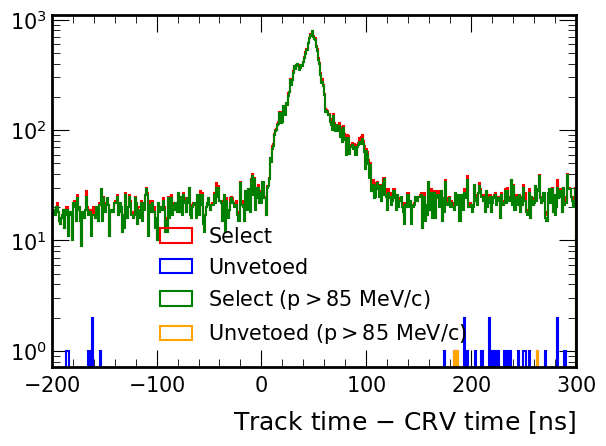

In [91]:
plotter.plot_1D_overlay(
    {
        "Select" : ak.flatten(data["no_veto"]["events"]["dT"], axis=None),
        "Unvetoed" : ak.flatten(data["veto"]["events"]["dT"], axis=None),
        r"Select ($p > 85$ MeV/c)" : ak.flatten(data["no_veto"]["events"]["dT"][data["no_veto"]["events"]["mom_mag_trk_mid"] > 85], axis=None),
        r"Unvetoed ($p > 85$ MeV/c)" : ak.flatten(data["veto"]["events"]["dT"][data["veto"]["events"]["mom_mag_trk_mid"] > 85], axis=None),
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    log_y=True
)

In [68]:
help(vector.get_mag)

Help on method get_mag in module pyutils.pyvector:

get_mag(branch, vector_name) method of pyutils.pyvector.Vector instance
    Return an array of vector magnitudes for specified branch

    Args:
        branch (awkward.Array): The branch, such as trgsegs or crvcoincs
        vector_name: The parameter associated with the vector, such as 'mom' or 'pos'



In [85]:
# 

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


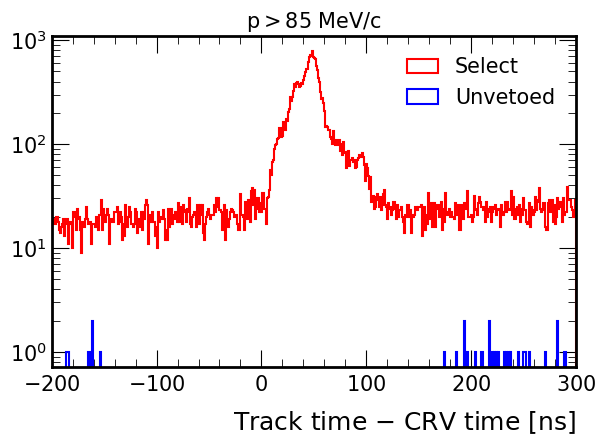

In [84]:
# vec_mag_veto = vector.get_mag(data["veto"]["events"]["trkfit"]["trksegs"], "mom")
vec_mag_no_veto = vector.get_mag(data["no_veto"]["events"]["trkfit"]["trksegs"][data["no_veto"]["events"]["at_trk_mid"]], "mom")
vec_mag_veto = vector.get_mag(data["veto"]["events"]["trkfit"]["trksegs"][data["veto"]["events"]["at_trk_mid"]], "mom")
# vec_mag_veto = vector.get_mag(data["veto"]["events"]["trkfit"]["trksegs"][at_trk_mid], "mom")

plotter.plot_1D_overlay(
    {
        "Select" : ak.flatten(data["no_veto"]["events"]["dT"][vec_mag_no_veto > 85], axis=None),
        "Unvetoed" : ak.flatten(data["veto"]["events"]["dT"][vec_mag_veto < 85], axis=None),
    },
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    title=r"$p > 85$ MeV/c",
    log_y=True
)